1.Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.Download data

In [2]:
customers_df=pd.read_csv("dim_customers.csv")

3.Initial data check

In [3]:
print(customers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   4372 non-null   int64  
 1   Order City    4372 non-null   object 
 2   Order Postal  4372 non-null   object 
 3   Order State   4372 non-null   object 
 4   Latitude      4282 non-null   float64
 5   Longitude     4282 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 205.1+ KB
None


In [4]:
print(customers_df.describe())

        Customer ID     Latitude    Longitude
count   4372.000000  4282.000000  4282.000000
mean   15299.677722    37.785725   -92.339507
std     1722.390705     5.304073    17.368989
min    12346.000000    19.920000  -158.185900
25%    13812.750000    33.987950  -105.124400
50%    15300.500000    38.882300   -86.635150
75%    16778.250000    41.360600   -77.968400
max    18287.000000    61.216300   -68.569100


In [5]:
print (customers_df.isnull().sum())

Customer ID      0
Order City       0
Order Postal     0
Order State      0
Latitude        90
Longitude       90
dtype: int64


In [6]:
print (customers_df.nunique())

Customer ID     4372
Order City      2657
Order Postal    4239
Order State      206
Latitude        2402
Longitude       2412
dtype: int64


In [7]:
print (customers_df.duplicated().sum())

0


4. Handle missing values

In [8]:
customers_df['Latitude'].fillna(customers_df['Latitude'].median(), inplace=True)
customers_df['Longitude'].fillna(customers_df['Longitude'].median(), inplace=True)

In [9]:
print (customers_df.isnull().sum())

Customer ID     0
Order City      0
Order Postal    0
Order State     0
Latitude        0
Longitude       0
dtype: int64


In [10]:
customers_df = customers_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

C:\Users\ElSakka Group\AppData\Local\Temp\ipykernel_2384\1268623216.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customers_df = customers_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [11]:
state_abbreviations =  {
    'alabama': 'al', 'alaska': 'ak', 'arizona': 'az', 'arkansas': 'ar', 'california': 'ca',
    'colorado': 'co', 'connecticut': 'ct', 'delaware': 'de', 'florida': 'fl', 'georgia': 'ga',
    'hawaii': 'hi', 'idaho': 'id', 'illinois': 'il', 'indiana': 'in', 'iowa': 'ia',
    'kansas': 'ks', 'kentucky': 'ky', 'louisiana': 'la', 'maine': 'me', 'maryland': 'md',
    'massachusetts': 'ma', 'michigan': 'mi', 'minnesota': 'mn', 'mississippi': 'ms', 'missouri': 'mo',
    'montana': 'mt', 'nebraska': 'ne', 'nevada': 'nv', 'new hampshire': 'nh', 'new jersey': 'nj',
    'new mexico': 'nm', 'new york': 'ny', 'north carolina': 'nc', 'north dakota': 'nd',
    'ohio': 'oh', 'oklahoma': 'ok', 'oregon': 'or', 'pennsylvania': 'pa', 'rhode island': 'ri',
    'south carolina': 'sc', 'south dakota': 'sd', 'tennessee': 'tn', 'texas': 'tx',
    'utah': 'ut', 'vermont': 'vt', 'virginia': 'va', 'washington': 'wa', 'west virginia': 'wv',
    'wisconsin': 'wi', 'wyoming': 'wy','Wisconsin':'wi'
}

In [12]:
customers_df['Order State'] = customers_df['Order State'].replace(state_abbreviations)

print(customers_df)

      Customer ID            Order City Order Postal Order State  Latitude  \
0           18287          rock springs   82901-7321          wy   41.5869   
1           18283               jackson   83001-9460          wy   43.4800   
2           18282              greybull        82426          wy   44.4892   
3           18281              evanston   82930-4706          wy   41.2680   
4           18280              cheyenne   82001-7901          wy   41.1400   
...           ...                   ...          ...         ...       ...   
4367        12350             riverside   92507-0141          ca   33.9534   
4368        12349             rio vista   94571-2264          ca   38.1558   
4369        12348  rancho santa margari        92688          ca   38.8823   
4370        12347         pleasant hill        94523          ca   37.9480   
4371        12346           palm desert   92211-7521          ca   33.7288   

      Longitude  
0    -109.20480  
1    -110.76180  
2    -108

In [14]:
customers_df["Customer ID"] = customers_df["Customer ID"].astype(str)

In [15]:
print(customers_df)

     Customer ID            Order City Order Postal Order State  Latitude  \
0          18287          rock springs   82901-7321          wy   41.5869   
1          18283               jackson   83001-9460          wy   43.4800   
2          18282              greybull        82426          wy   44.4892   
3          18281              evanston   82930-4706          wy   41.2680   
4          18280              cheyenne   82001-7901          wy   41.1400   
...          ...                   ...          ...         ...       ...   
4367       12350             riverside   92507-0141          ca   33.9534   
4368       12349             rio vista   94571-2264          ca   38.1558   
4369       12348  rancho santa margari        92688          ca   38.8823   
4370       12347         pleasant hill        94523          ca   37.9480   
4371       12346           palm desert   92211-7521          ca   33.7288   

      Longitude  
0    -109.20480  
1    -110.76180  
2    -108.05620  
3  

In [16]:
customers_df.to_csv('cleaned_customers.csv', index=False)

In [17]:
customers_df.to_excel('customers_clean2.xlsx', index=False, engine='openpyxl')


Data Analysis

Analysis by city

In [18]:
state_counts = customers_df['Order State'].value_counts().head(10)


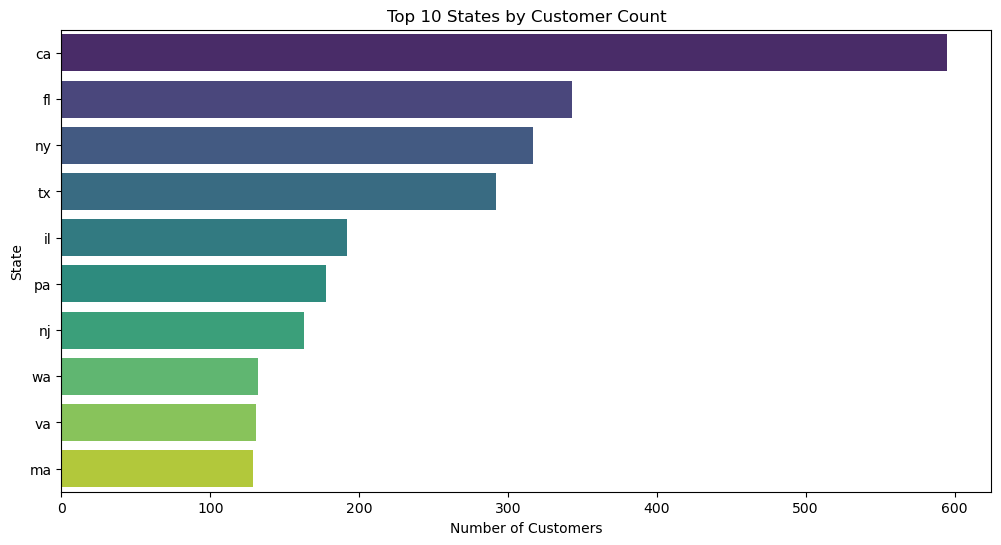

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette="viridis")
plt.title("Top 10 States by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.show()

Results:Most active cities: Milwaukee, Madison, Green Bay, Seattle.

Recommendation: Study the reasons for concentration in these cities and replicate the model in other cities.

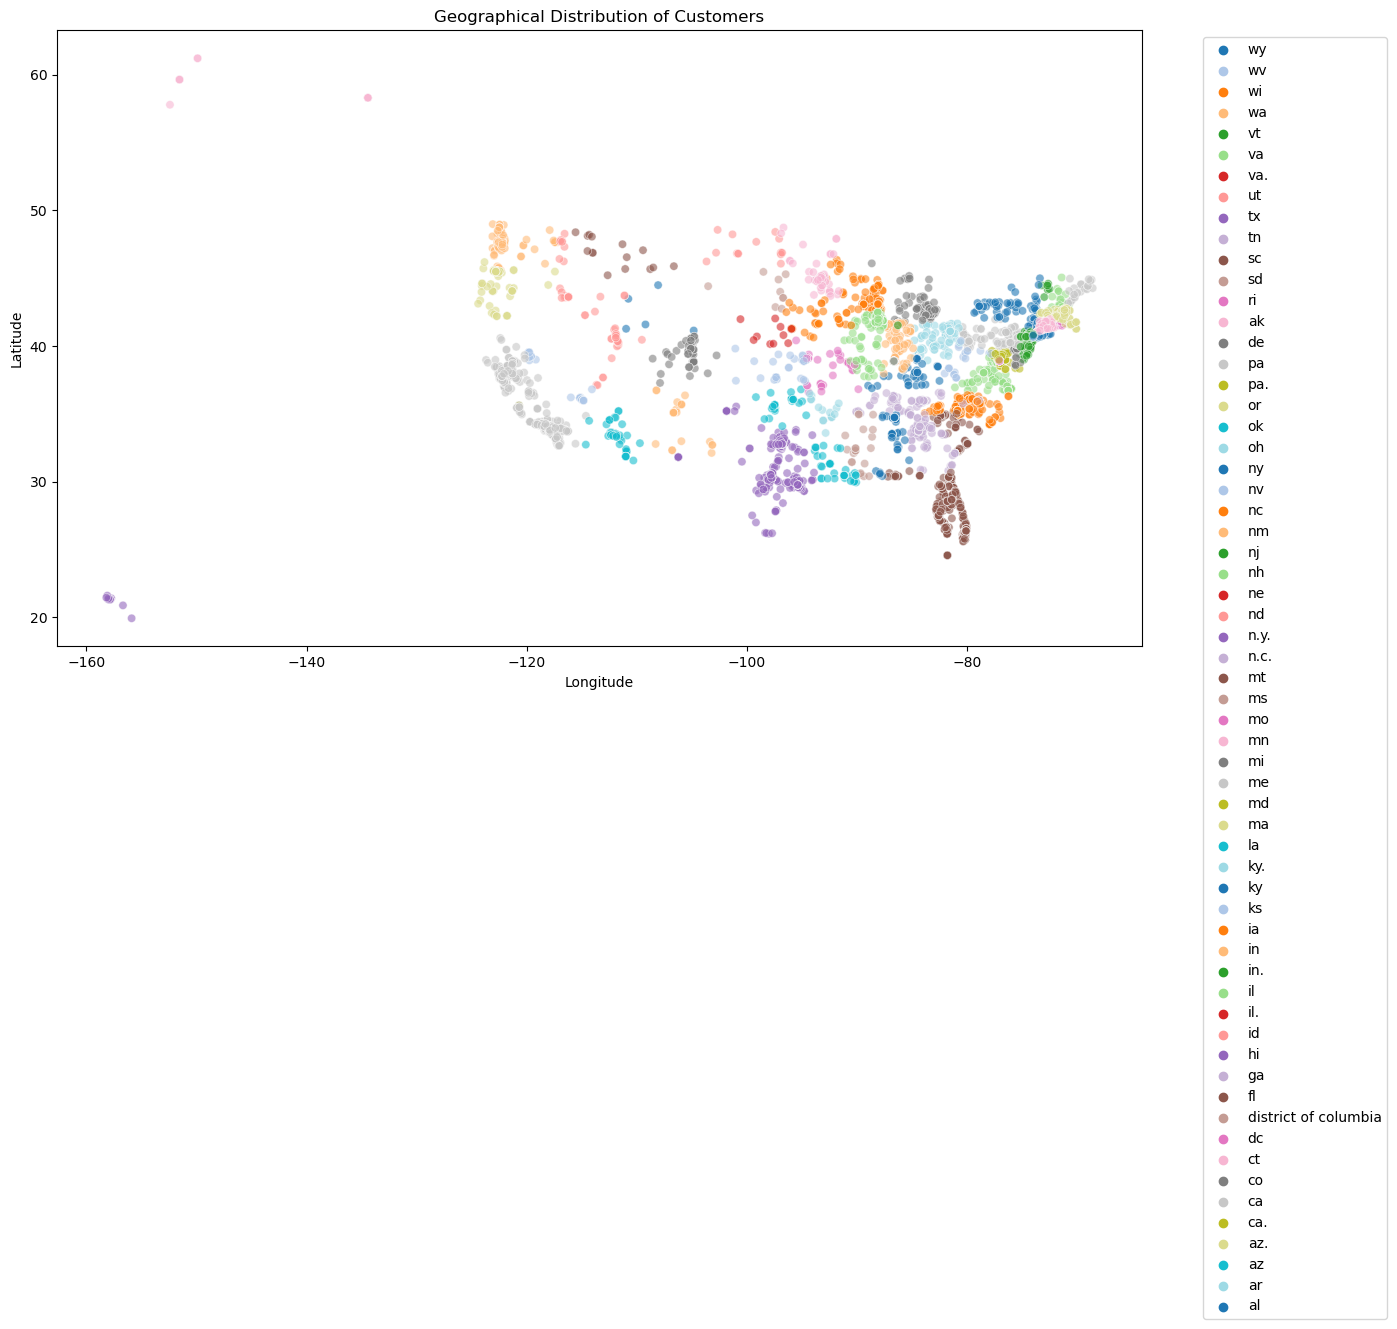

In [20]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=customers_df['Longitude'], y=customers_df['Latitude'], hue=customers_df['Order State'], palette="tab20", alpha=0.6)
plt.title("Geographical Distribution of Customers")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Results:Highest density areas: Midwest (Wisconsin) and West Coast (Washington).

Recommendation: Improve logistics in remote areas to increase access.

In [21]:
#5. Zip Code Analysis
customers_df['Order Postal'] = customers_df['Order Postal'].astype(str).str[:5]
postal_counts = customers_df['Order Postal'].value_counts().head(10)


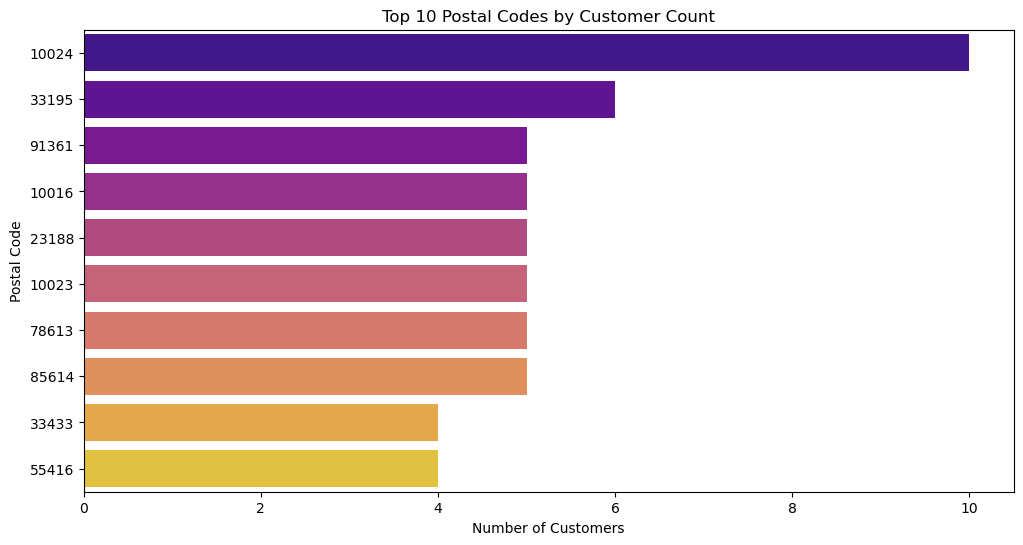

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=postal_counts.values, y=postal_counts.index, palette="plasma")
plt.title("Top 10 Postal Codes by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("Postal Code")
plt.show()

Results:Most active zip codes: 53211 (Milwaukee), 53590 (Sun Prairie), 54476 (Weston).

Recommendation: Study the demographics in these areas to better target them.

General Recommendations

Increase Presence in Active States:

Focus on states like Wisconsin (WI) and Washington (WA) with special offers and intensive marketing campaigns.

Focus on Major Cites:

Target cities like Milwaukee and Seattle by improving logistics and launching local marketing campaigns.

Enhance Infrastructure in High-Densit Areas:

Establish additional distribution centers in high-density areas to ensure faster delivery.

Target Specifi Zip Codes:

Offer customized promotions for customers in the most active zip codes, such as 53211 and 53590.

Analyze Competition n Major Cities:

Study competitors' strategies in major cities and differentiate by offering unique deals and highe service quality.

Improve Customer Experiece in Remote Areas:

Provide free or discounted delivery offers for customers in remote areas to icrease accessibility.

Use Data for Stategic Decision-Making:

Regularly analyze data to monitor trends and improve offers and inventory overall customer experience.

In [23]:
customers_df.to_excel('customers_analysiss3.xlsx', index=False, engine='openpyxl')
